In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data/converted_test_2020_06_16_09-31-01.csv',parse_dates=['Flight_Date','Request_Date'])

In [5]:
data

,Unnamed: 0,Request_Date,Flight_Date,Duration_Time,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency,price_in_eur,Request_Weekday,Request_AM_PM
0,0,2019-07-28 11:00:00,2019-07-29 18:00:00,31.0,18,2019-07-29 FR 146,SXF-STN,FR 146,73.43,€,73.43,Sunday,AM
1,1,2019-07-28 11:00:00,2019-07-29 22:00:00,35.0,22,2019-07-29 FR 8545,SXF-STN,FR 8545,180.53,€,180.53,Sunday,AM
2,2,2019-07-28 11:00:00,2019-07-30 06:00:00,43.0,6,2019-07-30 FR 144,SXF-STN,FR 144,61.19,€,61.19,Sunday,AM
3,3,2019-07-28 23:00:00,2019-07-30 06:00:00,31.0,6,2019-07-30 FR 144,SXF-STN,FR 144,73.43,€,73.43,Sunday,PM
4,4,2019-07-28 11:00:00,2019-07-30 10:00:00,47.0,10,2019-07-30 FR 8543,SXF-STN,FR 8543,180.53,€,180.53,Sunday,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119,5119,2019-07-31 23:00:00,2019-09-10 10:00:00,971.0,10,2019-09-10 FR 8543,SXF-STN,FR 8543,35.69,€,35.69,Wednesday,PM
5120,5120,2019-08-01 11:00:00,2019-09-10 10:00:00,959.0,10,2019-09-10 FR 8543,SXF-STN,FR 8543,35.69,€,35.69,Thursday,AM
5121,5121,2019-08-01 23:00:00,2019-09-10 10:00:00,947.0,10,2019-09-10 FR 8543,SXF-STN,FR 8543,46.83,€,46.83,Thursday,PM
5122,5122,2019-08-02 11:00:00,2019-09-10 10:00:00,935.0,10,2019-09-10 FR 8543,SXF-STN,FR 8543,46.83,€,46.83,Friday,AM


In [6]:
data.dtypes

Unnamed: 0                   int64
Request_Date        datetime64[ns]
Flight_Date         datetime64[ns]
Duration_Time              float64
Departure_hour               int64
flight_unique_id            object
route_abb                   object
flight_number               object
Price                      float64
Currency                    object
price_in_eur               float64
Request_Weekday             object
Request_AM_PM               object
dtype: object

In [32]:
##number of total requested flights per route, min, max, mean price
data.groupby('route_abb').price_in_eur.agg(['count', 'min', 'max', 'mean'])

,count,min,max,mean
route_abb,,,,
FRA-STN,929,12.990000,311.090000,87.825662
STN-FRA,899,11.713473,243.054591,67.697934
STN-SXF,1588,11.713473,210.854971,67.095134
SXF-STN,1708,12.990000,266.130000,100.096470


In [35]:
##min, max, mean price for each flight with the same flight number
data.groupby('flight_number').price_in_eur.agg(['count', 'min', 'max', 'mean'])

,count,min,max,mean
flight_number,,,,
FR 144,482,17.990000,266.130000,83.544232
FR 145,447,11.713473,207.529888,69.378107
FR 146,397,42.830000,264.130000,124.386474
FR 147,382,11.713473,210.479801,70.835918
FR 1546,468,12.990000,311.090000,100.213761
FR 1547,455,11.713473,241.720685,73.453787
FR 1686,461,12.990000,254.990000,75.249458
FR 1687,444,11.713473,243.054591,61.799480
FR 8542,388,11.713473,210.854971,61.253138


In [36]:
data.groupby('Request_AM_PM').price_in_eur.agg(['count', 'min', 'max', 'mean']) 

,count,min,max,mean
Request_AM_PM,,,,
AM,2557,11.713473,311.09,81.575491
PM,2567,11.713473,311.09,82.342733


In [37]:
%matplotlib inline

flight_number
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: price_in_eur, dtype: object

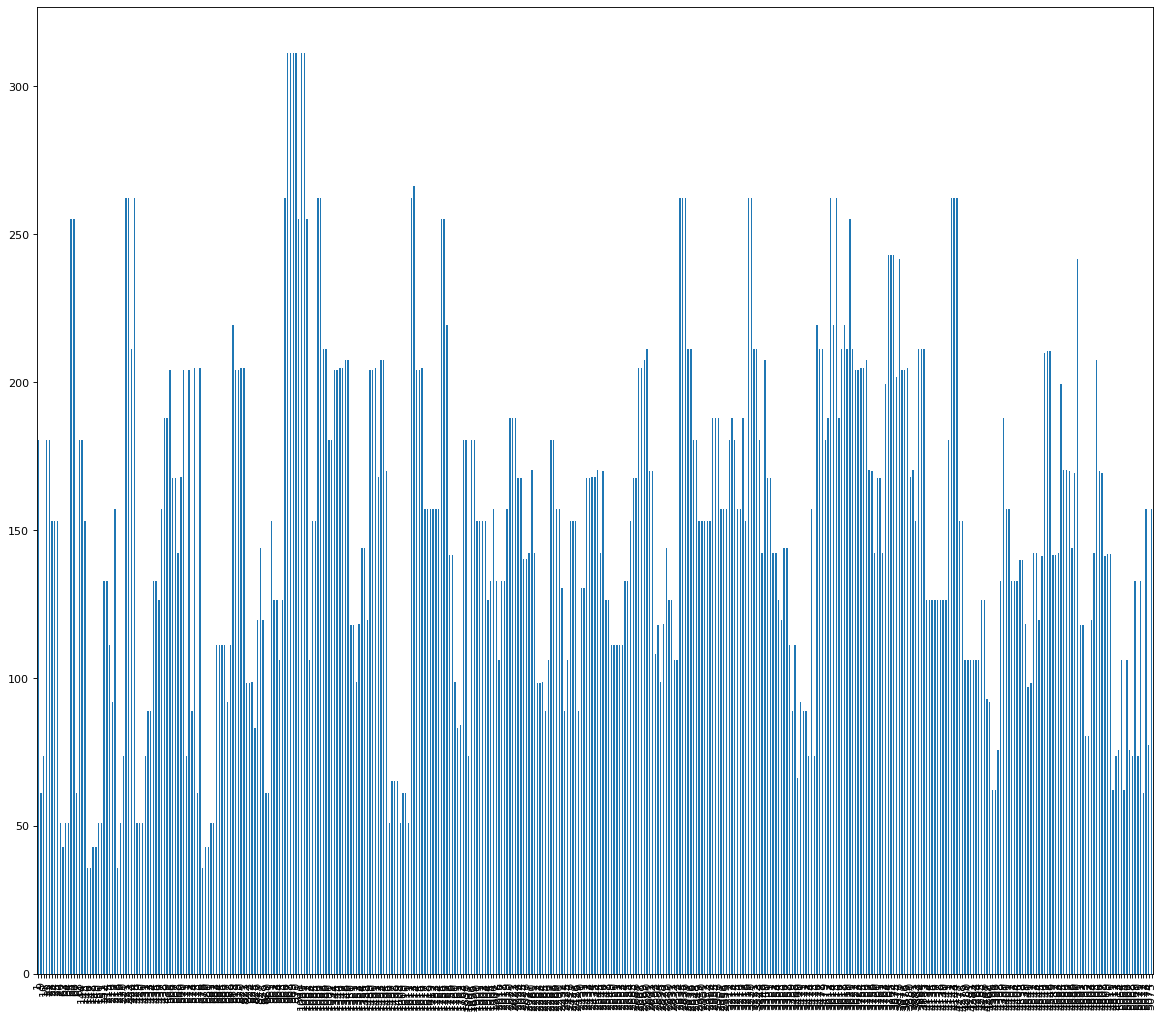

In [43]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
data.groupby(data.flight_number=='FR 8545').price_in_eur.plot(kind='bar')